# Simple classification

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_url =  "https://raw.githubusercontent.com/mcnakhaee/palmerpenguins/refs/heads/master/palmerpenguins/data/penguins.csv"
penguins = pd.read_csv(data_url)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


##  Helper functions

In [14]:
def examine_penguins(penguins): 
  attribs = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "species"]

  # Plot the pair grid
  g = sns.PairGrid(penguins[attribs], hue="species")
  g.map_diag(sns.histplot)
  g.map_offdiag(sns.scatterplot)
  g.add_legend()
  return g 

In [15]:

# Don't touch this cell!
def plotSVMResults(X,y, model):

  # Step 1: Create a mesh grid for plotting
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Step 2: Predict the class labels for the grid points
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  features = set(y)

  Z_num = Z.copy()
  y_num = y.copy()

  ## Change nominal values to 0 or 1
  for (i,label) in enumerate(features):
    Z_num[Z_num[:,:]==label] = i 
    y_num[y_num[:]==label] = i 

  Z_num = Z_num.astype(int)
  y_num = y_num.astype(int)

  fig, ax = plt.subplots()

  #  Plot the decision boundary and the data points
  ax.contourf(xx, yy, Z_num, alpha=0.8)
  ax.scatter(X[:, 0], X[:, 1], c=y_num, edgecolors='k', marker='o')
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.set_title('SVM Decision Boundary with LinearSVC')

  return (ax,fig)
  

## Setting up our data
Reminder: We're trying to just classify Adelie and Chinstrap penguins

In [16]:
from sklearn.svm import LinearSVC

peng_no_gentoo = penguins.loc[penguins["species"] != "Gentoo",:].dropna()
peng_no_gentoo

# We are going to split our data into... 
# X, which will be the attributes (bill_length_mm, flipper_length_mm)
# y, which will be our labels (species)
X = peng_no_gentoo.loc[:,["bill_length_mm","flipper_length_mm"]]
y = peng_no_gentoo.loc[:,"species"]

# This turns our data into matrices (numpy)
X = X.values
y = y.values





# Training/Testing Split

Here we are going to split x and y into training and testing data sets

In [27]:
from sklearn.model_selection import train_test_split

# Use a random selection of 10% of our data for testing
# and 90% for training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state = 0
)

model = LinearSVC()

model.fit(X_train, y_train)

LinearSVC()

## Examine our training/testing accuracy

In [28]:
# Examine our training accuracy
training_accuracy = model.score(X_train, y_train)
print("Training Accuracy = %0.2f%%" % (training_accuracy * 100))

# Examine our testing accuracy
testing_accuracy = model.score(X_test, y_test)
print("Testing Accuracy = %0.2f%%" % (testing_accuracy * 100))


Training Accuracy = 95.83%
Testing Accuracy = 95.45%


High training and testing accuracy; model seems to generalize well. Let's visualize these results. 

(<Axes: title={'center': 'SVM Decision Boundary with LinearSVC'}, xlabel='Feature 1', ylabel='Feature 2'>,
 <Figure size 640x480 with 1 Axes>)

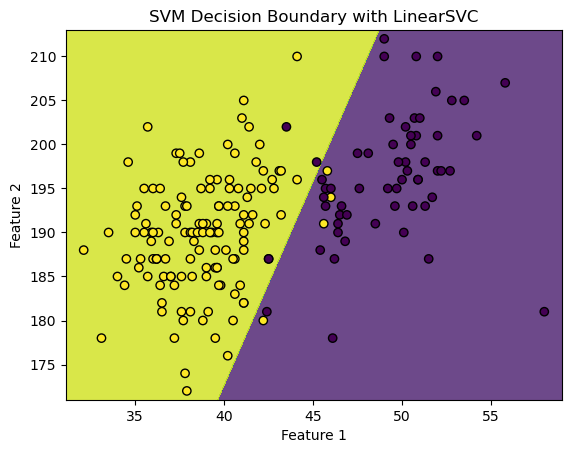

In [32]:
# Plot training results
plotSVMResults(X_train, y_train, model)

(<Axes: title={'center': 'SVM Decision Boundary with LinearSVC'}, xlabel='Feature 1', ylabel='Feature 2'>,
 <Figure size 640x480 with 1 Axes>)

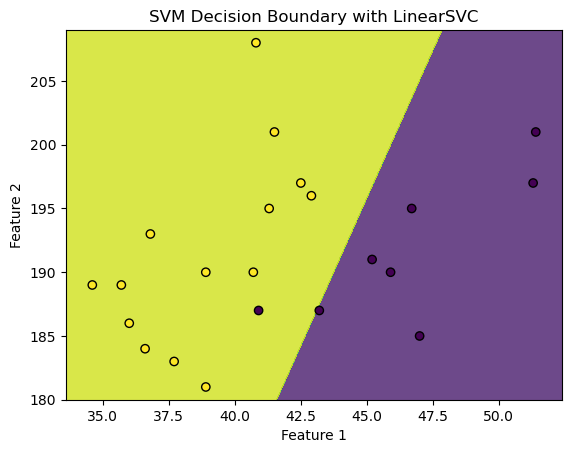

In [31]:
# Plot testing results
plotSVMResults(X_test, y_test, model)